# 🏥 Logistic Regression: Predicting Diabetes (Binary Classification)

## 🎯 Real-World Scenario

You're a data analyst at a healthcare provider. Doctors need help identifying patients at risk of diabetes based on medical measurements.

You decide to build a **Logistic Regression** model to predict whether a patient has diabetes (`1`) or not (`0`).

---

## 📁 Dataset

We'll use the **Pima Indians Diabetes Dataset** (publicly available):

[🔗 Dataset Link](https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv)

### 🔢 Dataset Features

| Feature                   | Description                                 |
|---------------------------|---------------------------------------------|
| Pregnancies               | Number of times pregnant                    |
| Glucose                   | Plasma glucose concentration                |
| BloodPressure             | Diastolic blood pressure (mm Hg)            |
| SkinThickness             | Triceps skinfold thickness (mm)             |
| Insulin                   | 2-Hour serum insulin (mu U/ml)              |
| BMI                       | Body mass index (weight/height²)            |
| DiabetesPedigreeFunction  | Genetic predisposition                      |
| Age                       | Age (years)                                 |
| Outcome                   | Diabetes (0 = No, 1 = Yes)                  |

---

## ✅ Problem Statement

Predict whether a person has diabetes (`Outcome = 1`) or not (`Outcome = 0`) based on features like glucose level, BMI, and age.

---

## 🧪 Full Code Implementation

### 🔹 Step 1: Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


###  Step 2: Load the Dataset

In [2]:
url = 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'
df = pd.read_csv(url)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Step 3: Explore and Clean Data 


In [3]:
df.info()
df.describe()
print(df['Outcome'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Outcome
0    500
1    268
Name: count, dtype: int64


#### Optional: Check for zeros in features that shouldn't be zero.


In [7]:
features_to_check = ['Glucose', 'BloodPressure', 'BMI', 'Insulin']
for col in features_to_check:
    print(f"{col} has {len(df[df[col] == 0])} zero values")

#Replace zeros with NaN (if desired), or keep them as is for this example.



Glucose has 5 zero values
BloodPressure has 35 zero values
BMI has 11 zero values
Insulin has 374 zero values


### Step 4: Correlation Heatmap

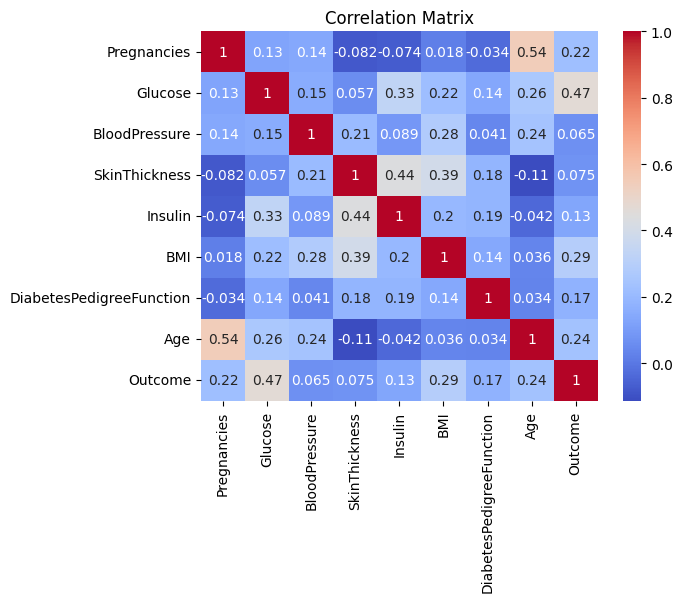

In [8]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


###  Step 5: Split Data
 

In [9]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Step 6: Feature Scaling (Standardization) 
Feature scaling ensures that all input features have similar scales, which helps many machine learning algorithms perform better. **Standardization** transforms features so they have a mean of 0 and a standard deviation of 1. This is especially important for algorithms like logistic regression, which are sensitive to the scale of input data.

We'll use `StandardScaler` from scikit-learn to standardize our features before training the model.

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


 ###  Logistic Regression
Logistic Regression is a supervised machine learning algorithm used for **binary classification** problems—where the output is categorical (e.g., disease vs. no disease).

**Equation:**  
Logistic Regression predicts the probability that a sample belongs to a particular class using the sigmoid (logistic) function:

$$
P(y=1|X) = \sigma(w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n) = \frac{1}{1 + e^{-(w_0 + w_1x_1 + \ldots + w_nx_n)}}
$$

- $P(y=1|X)$: Probability of class 1 given features $X$
- $w_0, w_1, ..., w_n$: Model coefficients (weights)
- $\sigma(z)$: Sigmoid function, squashes output to [0, 1]

**Use Cases:**  
- Medical diagnosis (disease vs. no disease)
- Email spam detection (spam vs. not spam)
- Customer churn (leave vs. stay)

**Difference from Linear Regression:**  
- **Linear Regression** predicts a continuous value (e.g., house price).
- **Logistic Regression** predicts a probability (between 0 and 1) and is used for classification.
- Logistic Regression uses the sigmoid function to map predictions to probabilities, while Linear Regression outputs any real number.

**Summary Table:**

| Aspect                | Linear Regression         | Logistic Regression           |
|-----------------------|--------------------------|------------------------------|
| Output                | Continuous value         | Probability (0 to 1)         |
| Problem Type          | Regression               | Classification (binary/multi)|
| Activation Function   | None (identity)          | Sigmoid/Logistic             |
| Example Use           | Predict price            | Predict class (yes/no)       |


 ### Train Logistic Regression

In [11]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Step 8: Predict and Evaluate

Accuracy: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



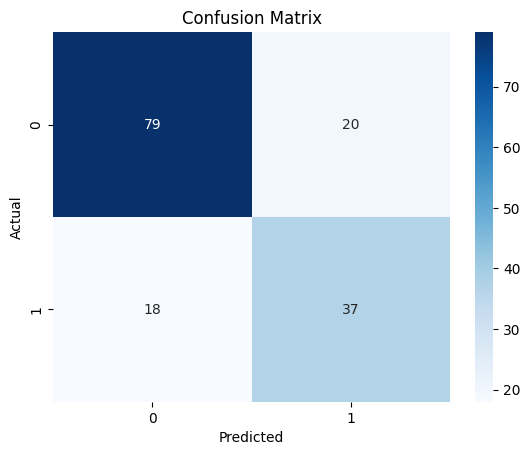

In [12]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## 🟦 Understanding the Confusion Matrix and Results

### What is a Confusion Matrix?

A **confusion matrix** is a table used to evaluate the performance of a classification model. It compares the model's predicted labels with the true labels to show how many predictions were correct or incorrect for each class.

For binary classification, the confusion matrix looks like this:

|                | Predicted: No (0) | Predicted: Yes (1) |
|----------------|------------------|--------------------|
| **Actual: No (0)**  | True Negative (TN)   | False Positive (FP)   |
| **Actual: Yes (1)** | False Negative (FN)  | True Positive (TP)    |

### Your Results

The confusion matrix from your model is:

```
[[79, 20],
 [18, 37]]
```

- **79** True Negatives (TN): Model correctly predicted 'No Diabetes' (0).
- **20** False Positives (FP): Model predicted 'Diabetes' (1), but actually 'No Diabetes' (0).
- **18** False Negatives (FN): Model predicted 'No Diabetes' (0), but actually 'Diabetes' (1).
- **37** True Positives (TP): Model correctly predicted 'Diabetes' (1).

### Key Metrics

- **Accuracy:** Proportion of correct predictions  
    $$
    \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{37 + 79}{79 + 20 + 18 + 37} = \frac{116}{154} \approx 0.753
    $$

- **Precision (for Diabetes):** Of all predicted positives, how many are actually positive?  
    $$
    \text{Precision} = \frac{TP}{TP + FP} = \frac{37}{37 + 20} \approx 0.649
    $$

- **Recall (Sensitivity):** Of all actual positives, how many did the model correctly identify?  
    $$
    \text{Recall} = \frac{TP}{TP + FN} = \frac{37}{37 + 18} \approx 0.673
    $$

### Interpretation

- The model correctly identifies most patients without diabetes (high TN).
- It also finds a fair number of patients with diabetes (TP), but misses some (FN).
- There are some false alarms (FP), where the model predicts diabetes but the patient does not have it.
- **Overall accuracy is about 75%.**  
- **Precision and recall for diabetes are both around 65-67%.**

**Conclusion:**  
The model performs reasonably well, but there is room for improvement, especially in reducing false negatives (missed diabetes cases) and false positives (unnecessary alerts).

📘 **Interpretation of Results**

---

### ✅ Key Metrics

- **Accuracy:** Overall correctness of the model.
- **Precision:** Correctness among positive predictions (how many predicted positives are actually positive).
- **Recall:** Model’s ability to find all positive cases (how many actual positives are identified).
- **F1-score:** Balance between precision and recall.

---

### 📌 Real-World Usage

This model can:
- Alert doctors about high-risk patients.
- Help in screening programs.
- Be integrated into mobile health apps.

---

### 🧠 Logistic Regression Explained Simply

- Logistic regression outputs a probability between 0 and 1.
- If the probability is > 0.5 → Class 1 (diabetic)
- Else → Class 0 (not diabetic)

It uses the **sigmoid function**:

In [ ]:
probability = 1 / (1 + e^(- (b0 + b1*x1 + b2*x2 + ...)))


In [19]:
# Define 3 sample patients with names and their medical features
# Feature order: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
patients = [
    {
        "name": "Eve",
        "data": [8, 180, 90, 40, 250, 38.0, 1.2, 55],  # High risk: high glucose, insulin, BMI, age
        "desc": "Eve has very high glucose, insulin, BMI, and is older. Likely to have diabetes."
    },
    {
        "name": "Frank",
        "data": [6, 170, 85, 35, 200, 36.5, 0.9, 50],  # High risk: high glucose, insulin, BMI, age
        "desc": "Frank has high glucose, insulin, BMI, and is middle-aged. Likely to have diabetes."
    },
    {
        "name": "Grace",
        "data": [1, 90, 65, 20, 60, 22.5, 0.2, 25],  # Low risk: low glucose, BMI, young
        "desc": "Grace is young with low glucose and BMI. Unlikely to have diabetes."
    }
]

# Prepare data for prediction
patients_data = [p["data"] for p in patients]
patients_scaled = scaler.transform(patients_data)
patients_pred = model.predict(patients_scaled)

# Print predictions, data, and explanations
for i, p in enumerate(patients):
    print(f"{p['name']} - {p['desc']}")
    print(f"  Data: {p['data']}")
    print(f"  Predicted Outcome (1=Diabetes, 0=No Diabetes): {patients_pred[i]}\n")

Eve - Eve has very high glucose, insulin, BMI, and is older. Likely to have diabetes.
  Data: [8, 180, 90, 40, 250, 38.0, 1.2, 55]
  Predicted Outcome (1=Diabetes, 0=No Diabetes): 1

Frank - Frank has high glucose, insulin, BMI, and is middle-aged. Likely to have diabetes.
  Data: [6, 170, 85, 35, 200, 36.5, 0.9, 50]
  Predicted Outcome (1=Diabetes, 0=No Diabetes): 1

Grace - Grace is young with low glucose and BMI. Unlikely to have diabetes.
  Data: [1, 90, 65, 20, 60, 22.5, 0.2, 25]
  Predicted Outcome (1=Diabetes, 0=No Diabetes): 0



d:\Trainings\Python for AI Engineers\pythonAiBasic\stLABS\LABS\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# 🎉 Congratulations!

You have successfully completed your first **Logistic Regression** project for binary classification.  
You learned how to:

- Load and explore real-world medical data
- Prepare and scale features
- Train a logistic regression model
- Evaluate model performance with accuracy, precision, recall, and a confusion matrix
- Make predictions for new patients

Keep practicing and experimenting with different datasets and models to strengthen your machine learning skills! 🚀